# 1. Data Ingestion

We load the additional libraries needed in this notebook:
* `seaborn`
* `matplotlib.pyplot`
* `scipy`

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


We will be only using the data for **Perth** location and  so we filter the dataset accordingly:

In [3]:
all_df = pd.read_csv("/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv")

# Limit the dataset to Perth records
df = all_df[all_df["Location"] == "Perth"]
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
120638,2008-07-01,Perth,2.7,18.8,0.0,0.8,9.1,ENE,20.0,NaN,...,97.0,53.0,1027.6,1024.5,2.0,3.0,8.5,18.1,No,No
120639,2008-07-02,Perth,6.4,20.7,0.0,1.8,7.0,NE,22.0,ESE,...,80.0,39.0,1024.1,1019.0,0.0,6.0,11.1,19.7,No,No
120640,2008-07-03,Perth,6.5,19.9,0.4,2.2,7.3,NE,31.0,NaN,...,84.0,71.0,1016.8,1015.6,1.0,3.0,12.1,17.7,No,Yes
120641,2008-07-04,Perth,9.5,19.2,1.8,1.2,4.7,W,26.0,NNE,...,93.0,73.0,1019.3,1018.4,6.0,6.0,13.2,17.7,Yes,Yes
120642,2008-07-05,Perth,9.5,16.4,1.8,1.4,4.9,WSW,44.0,W,...,69.0,57.0,1020.4,1022.1,7.0,5.0,15.9,16.0,Yes,Yes
120643,2008-07-06,Perth,0.7,15.9,6.8,2.4,9.3,NNE,24.0,ENE,...,86.0,41.0,1032.0,1029.6,0.0,1.0,6.9,15.5,Yes,No
120644,2008-07-07,Perth,0.7,18.3,0.0,0.8,9.3,N,37.0,NE,...,72.0,36.0,1028.9,1024.2,1.0,5.0,8.7,17.9,No,No
120645,2008-07-08,Perth,3.2,20.4,0.0,1.4,6.9,NNW,24.0,NE,...,58.0,42.0,1023.9,1021.1,6.0,5.0,10.2,19.3,No,Yes
120646,2008-07-09,Perth,9.8,19.5,8.0,1.2,2.5,ESE,31.0,NaN,...,97.0,64.0,1026.4,1024.9,7.0,6.0,12.1,18.7,Yes,Yes
120647,2008-07-10,Perth,11.2,20.4,4.6,2.8,1.7,NNW,46.0,NE,...,79.0,50.0,1020.2,1014.0,7.0,7.0,13.4,19.0,Yes,Yes


# 2. Exploratory Data Analysis

📙 **SUMMARY**
* The dataset contains $3,193$ records and $23$ columns including the target variable.
* The features include both numerical and categorical values.

Let's see how many records and columns there are in the dataset.

In [4]:
print(f"Number of records: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of records: 3193
Number of columns: 23


What are the columns and their properties?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3193 entries, 120638 to 123830
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3193 non-null   object 
 1   Location       3193 non-null   object 
 2   MinTemp        3193 non-null   float64
 3   MaxTemp        3192 non-null   float64
 4   Rainfall       3193 non-null   float64
 5   Evaporation    3192 non-null   float64
 6   Sunshine       3188 non-null   float64
 7   WindGustDir    3188 non-null   object 
 8   WindGustSpeed  3188 non-null   float64
 9   WindDir9am     3059 non-null   object 
 10  WindDir3pm     3186 non-null   object 
 11  WindSpeed9am   3193 non-null   float64
 12  WindSpeed3pm   3192 non-null   float64
 13  Humidity9am    3184 non-null   float64
 14  Humidity3pm    3185 non-null   float64
 15  Pressure9am    3192 non-null   float64
 16  Pressure3pm    3192 non-null   float64
 17  Cloud9am       3191 non-null   float64
 18  C

🔖 The dataset has $23$ columns including the target variable (*RainTomorrow*):
* It consists of both numerical (`float64`) and categorical (`object`) features.
* Most of the columns have null values which requires addressing later 

# _2.1 Target Variable: RainTomorrow

📙 **SUMMARY**
* The target variable has two possible values: **Yes** and **No**.
* The dataset is **highly imbalanced**:
 * **Yes** - $645$ ($20.2\%$) records
 * **No** - $2,548$ ($79.8\%$) records

Let's have a sneak peek ofthe target variable, *RainTomorrow*.

In [6]:
target = df['RainTomorrow']
target.head(15)

120638     No
120639     No
120640    Yes
120641    Yes
120642    Yes
120643     No
120644     No
120645    Yes
120646    Yes
120647    Yes
120648    Yes
120649     No
120650     No
120651     No
120652    Yes
Name: RainTomorrow, dtype: object

The target, *RainTomorrow*, is a categorical variable of either **Yes** or **No**.

Let's count the values for each prediction.

In [7]:
target_count = target.value_counts()

yes_percent = float(target_count['Yes'])/len(target) * 100
no_percent = float(target_count['No'])/len(target) * 100

print('Target (RainTomorrow) Values Count')
print(f" * Yes:\t{target_count['Yes']:5} ({yes_percent:.1f}%)")
print(f" * No:\t{target_count['No']:5} ({(no_percent):.1f}%)")

Target (RainTomorrow) Values Count
 * Yes:	  645 (20.2%)
 * No:	 2548 (79.8%)


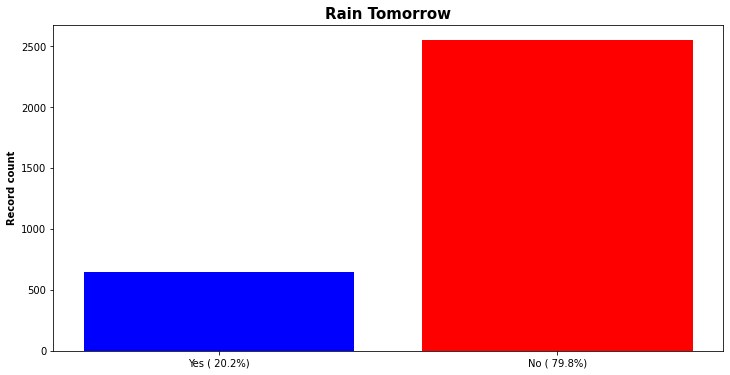

In [8]:
plt.figure(figsize=(12,6))
plt.title("Rain Tomorrow", fontweight="bold", fontsize=15)
plt.bar(f"Yes ({yes_percent: .1f}%)", target_count['Yes'], color="blue")
plt.bar(f"No ({no_percent: .1f}%)", target_count['No'], color="red")
plt.ylabel("Record count", fontweight="bold")
plt.show()

🔖 The dataset is highly imbalanced with the **No** prediction being $4$x more than the **Yes** prediction.

# _2.2 Numerical Features

More details regarding the features can be found [on this website](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml).

📙 **SUMMARY**
* *TODO*

Let's select the numerical columns from the dataset and an overview visualization.

In [9]:
num_df = df.select_dtypes(include=[np.float64])
num_df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

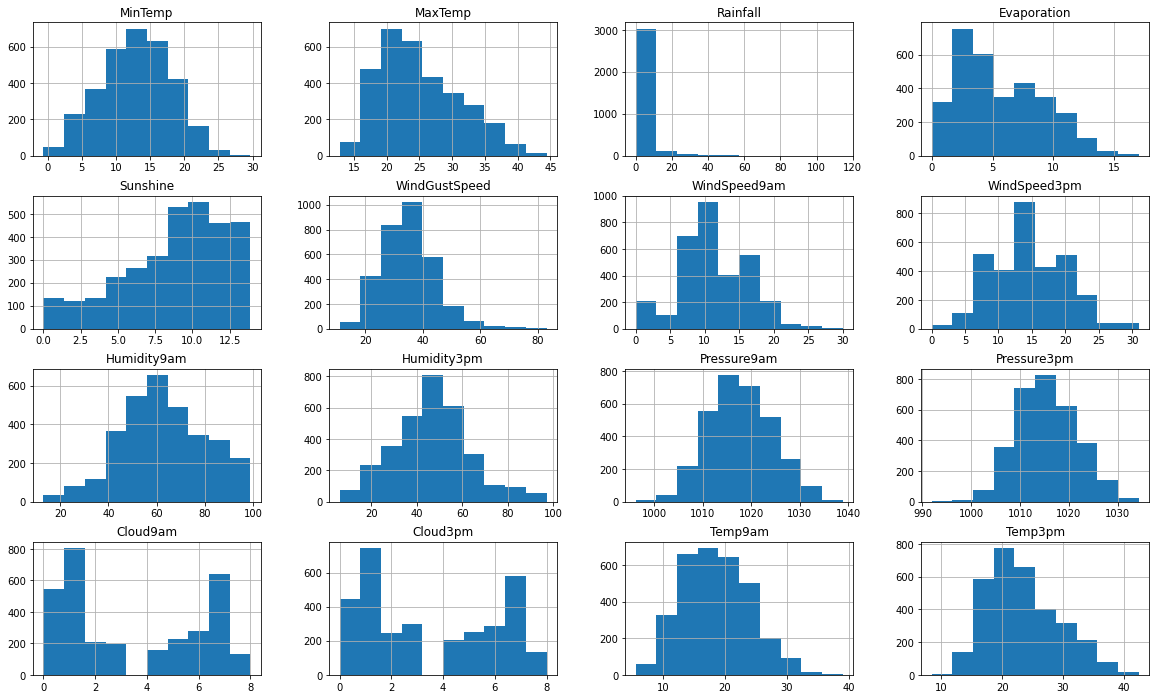

<Figure size 432x288 with 0 Axes>

In [10]:
num_df.hist(figsize=(20,12))
plt.figure()
# plt.show()

The **Cloud-\*** histogram seems to have a discontinuous distribution to it. Upon perusal [on the guide](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml), it seems that this feature is expressed in `eighth` units.

Let's revisualize this histogram, splitting it to $8$ bins this time.

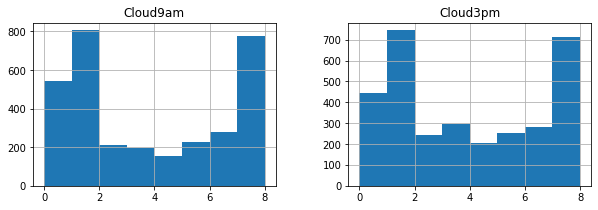

In [11]:
num_df.hist(column=['Cloud9am', 'Cloud3pm'], bins=8, figsize=(10,3))
plt.show()

### Temperature

📙 **SUMMARY**

Let's extract information from and visualize the temperature features. The temperature is expressed in `$^\circ$C.

,count,mean,std,min,25%,50%,75%,max
MinTemp,3193.0,12.922706,5.087817,-0.6,9.2,13.1,16.6,29.7
MaxTemp,3192.0,25.034837,6.115454,12.8,20.2,23.9,29.4,44.4


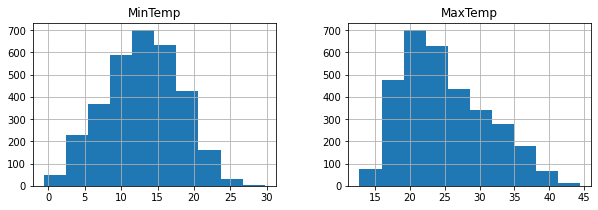

In [12]:
temp_df = num_df[['MinTemp','MaxTemp']]
temp_df.hist(figsize=(10,3))
temp_df.describe().transpose()

It seems like **MaxTemp** is negatively skewed. Let's compute the skewness for both features.

Note: The distribution is skewed is if it goes below $-0.5$ or beyond $0.5$.

In [13]:
print(f"MinTemp skewness: {num_df['MinTemp'].skew():.2f}")
print(f"MaxTemp skewness: {num_df['MaxTemp'].skew():.2f}")

MinTemp skewness: -0.08
MaxTemp skewness: 0.58


In [14]:
mintemp_df = num_df['MinTemp']
outliers = mintemp_df[np.abs(stats.zscore(mintemp_df)) > 3]
outliers

122570    29.7
Name: MinTemp, dtype: float64

MinTemp outlier count: 2
MaxTemp outlier count: 2


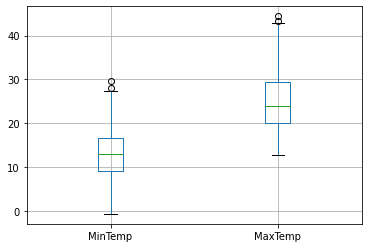

In [15]:
def extract_outliers(series):
    result = dict()
    col = series.dropna()
    mean = col.mean()
    [q3, q1] = np.percentile(col, [75,25])
    iqr = np.subtract(q3, q1)

    boundary = q3 + (1.5 * iqr)
    return col[col > boundary]

temp_df.boxplot()
min_temp_outliers = extract_outliers(num_df['MinTemp'])
max_temp_outliers = extract_outliers(num_df['MaxTemp'])

print(f"MinTemp outlier count: {len(min_temp_outliers)}")
print(f"MaxTemp outlier count: {len(max_temp_outliers)}")

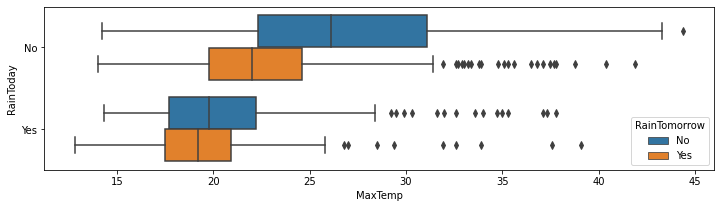

In [16]:
plt.figure(figsize=(12,3))
sns.boxplot(x=df['MaxTemp'], y=df['RainToday'], hue=df['RainTomorrow'])
plt.show()

Let's revisit the missing values for the feature once again.

In [17]:
missing_min_temp = num_df['MinTemp'].isna().sum()
missing_min_temp_perc = float(missing_min_temp)/len(num_df['MinTemp'])
print(f"MinTemp missing values: {missing_min_temp} ({missing_min_temp_perc:.2f}%)")

missing_max_temp = num_df['MaxTemp'].isna().sum()
missing_max_temp_perc = float(missing_max_temp)/len(num_df['MaxTemp'])
print(f"MaxTemp missing values: {missing_max_temp} ({missing_max_temp_perc * 100:.2f}%)")

MinTemp missing values: 0 (0.00%)
MaxTemp missing values: 1 (0.03%)


🔖 **Temperature feature observations**

**MinTemp**:
 * The distribution is almost **symmetric** (`skewness` = $0.08$).
 * There are $2$ outliers in the dataset.
 
**MaxTemp**
 * The distribution is **positively skewed** (`skewness` = $0.58$).
 * There are $2$ outliers in the dataset.

### __Rainfall

📙 **SUMMARY**
* The values represent the precipitation in the 24 hours to 9am and are expressed in **mm**.
* There are no missing values for the *Rainfall* attribute.
* The distribution is exponential.
* The dataset is dominated by $0.0$ values (more than $70\%$).


The attribute represents the precipitation within 24 hours and are expressed in **mm**. The values are in interleaved by $0.2$ units.

In [18]:
rainfall_df = num_df['Rainfall']
pd.DataFrame(rainfall_df).head(10)

,Rainfall
120638,0.0
120639,0.0
120640,0.4
120641,1.8
120642,1.8
120643,6.8
120644,0.0
120645,0.0
120646,8.0
120647,4.6


There are no missing values for the *Rainfall* attribute.

In [19]:
missing_rainfall_count = rainfall_df.isna().sum()
missing_rainfall_perc = rainfall_df.isna().sum() / float(len(rainfall_df))

print(f"Missing Rainfall values: {missing_rainfall_count} ({missing_rainfall_perc:.2f}%)")

Missing Rainfall values: 0 (0.00%)


The data ranges from $0.0$ to $114.4$ with a mean of $1.91$ and a standard deviation of $5.79$.

In [20]:
pd.DataFrame(rainfall_df).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rainfall,3193.0,1.906295,5.78995,0.0,0.0,0.0,0.2,114.4


The *Rainfall* data follows the exponential distribution, making it positively skewed.

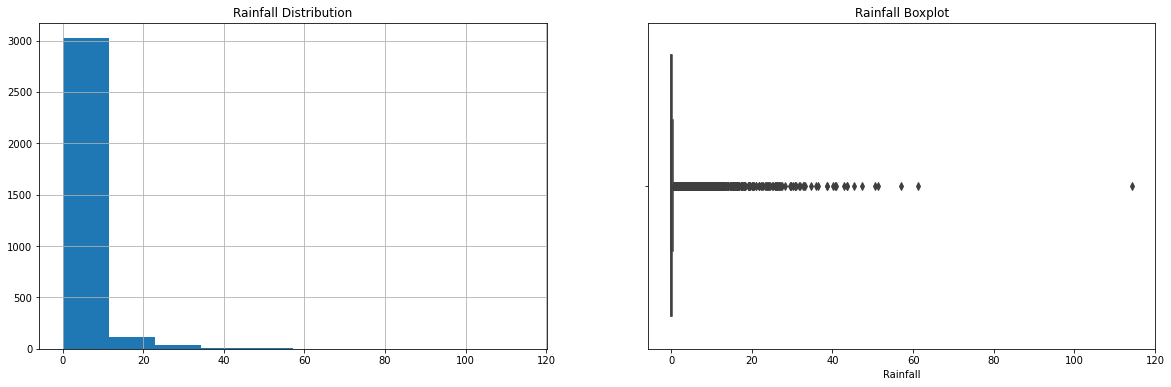

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

rainfall_df.hist(ax=axes[0])
axes[0].set_title("Rainfall Distribution")

sns.boxplot(ax=axes[1], x=rainfall_df)
axes[1].set_title("Rainfall Boxplot")

plt.show()

In [22]:
skewness = rainfall_df.skew()

print(f"Skewness of Rainfall: {skewness:.2f}")

Skewness of Rainfall: 6.14


In the dataset, the value $0.0$ comprises more than $70\%$ of the the dataset.

In [23]:
print("Top 10 Rainfall value occurences:")
value_count_perc = rainfall_df.value_counts()/len(rainfall_df)
value_count_perc.sort_values(ascending=False, inplace=True)
value_count_perc.iloc[:10]

Top 10 Rainfall value occurences:


0.0    0.718133
0.2    0.033824
0.4    0.016599
0.6    0.011588
0.8    0.009396
1.2    0.009082
1.0    0.008456
2.6    0.006264
1.6    0.005951
2.8    0.005637
Name: Rainfall, dtype: float64

### __Evaporation

📙 **SUMMARY**
* The values are expressed in **mm**.
* There is only $1$ missing value for this attribute.
* The distribution is positively skewed at `skewness` = $0.54$.
* There is $1$ outlier value in the dataset: $17.0$.

The *Evaporation* data represents the evaporation level in **mm** measured using the standard *Class A Evaporation Pan* within $24$ hours from 9AM. The values are rounded up to the nearest $0.2$ mm.

In [24]:
evap_df = df['Evaporation']
pd.DataFrame(evap_df).head(10)

,Evaporation
120638,0.8
120639,1.8
120640,2.2
120641,1.2
120642,1.4
120643,2.4
120644,0.8
120645,1.4
120646,1.2
120647,2.8


There's only $1$ missing value for the *Evaporation* attribute.

In [25]:
missing_evap_count = evap_df.isna().sum()
missing_evap_perc = missing_evap_count / len(evap_df)

print(f"Missing evaporation values: {missing_evap_count} ({missing_evap_perc:.4f}%)")

Missing evaporation values: 1 (0.0003%)


The values range from $0.0$ to $17.0$ with a mean of $5.61$ and a standard deviation of $3.42$.

In [26]:
pd.DataFrame(evap_df).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Evaporation,3192.0,5.606579,3.422893,0.0,2.6,4.8,8.2,17.0


The data is positively skewed with `skewness` = $0.54$. 

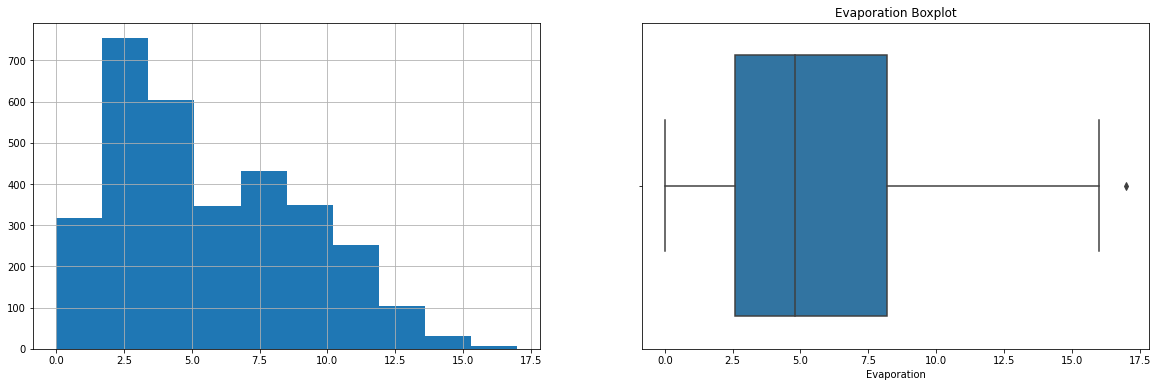

In [27]:
_, axes = plt.subplots(1, 2, figsize=(20, 6))

plt.title("Evaporation Distribution")
evap_df.hist(ax=axes[0])

plt.title("Evaporation Boxplot")
sns.boxplot(ax=axes[1], x=evap_df)

plt.show()

In [28]:
evap_skewness = evap_df.skew()

print(f"Skewness of Evaporation: {evap_skewness:.2f}")

Skewness of Evaporation: 0.54


There is only $1$ outlier in the dataset: $17.0$.

In [29]:
no_missing_evap = evap_df[~evap_df.isna()]
perc_75, perc_25 = np.percentile(no_missing_evap, [75, 25])
iqr = perc_75 - perc_25

evap_boundary = perc_75 + (1.5 * iqr)
evap_outliers = no_missing_evap[ no_missing_evap > evap_boundary]
print(f"Number of outliers: {len(evap_outliers.values)}")
print(f"Outliers: { [outlier for outlier in evap_outliers.values] }")

Number of outliers: 1
Outliers: [17.0]


### __Sunshine


📙 **SUMMARY**
* The attribute is expressed in terms of number of hours.
* The data has a mean of $8.78$ with a standard deviation of $3.47$.
* There are $5$ missing values in the dataset.
* The distribution is negatively skewed at `skewness` = $-0.74$.

The *Sunshine* attribute represents the number of hours with bright sunshine within 24 hours. Ergo, the value is capped at $24$ hours.

In [30]:
sunshine_df = num_df['Sunshine']
pd.DataFrame(sunshine_df).head(10)

,Sunshine
120638,9.1
120639,7.0
120640,7.3
120641,4.7
120642,4.9
120643,9.3
120644,9.3
120645,6.9
120646,2.5
120647,1.7


There are $5$ missing values for *Sunshine* values.

In [31]:
missing_sunshine_values = sunshine_df.isna().sum()
missing_sunshine_values_perc = missing_sunshine_values / len(sunshine_df)

print(f"Missing Sunshine values: {missing_sunshine_values} ({missing_sunshine_values_perc*100:.2f}%)")

Missing Sunshine values: 5 (0.16%)


The values range from $0.0$ to $13.0$ with a mean of $8.78$ and a standard deviation of $3.47$.

In [32]:
pd.DataFrame(sunshine_df).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sunshine,3188.0,8.784536,3.46685,0.0,6.6,9.4,11.5,13.9


The data is negatively skewed with `skewness` = $-0.74$. There are no outliers in the dataset.

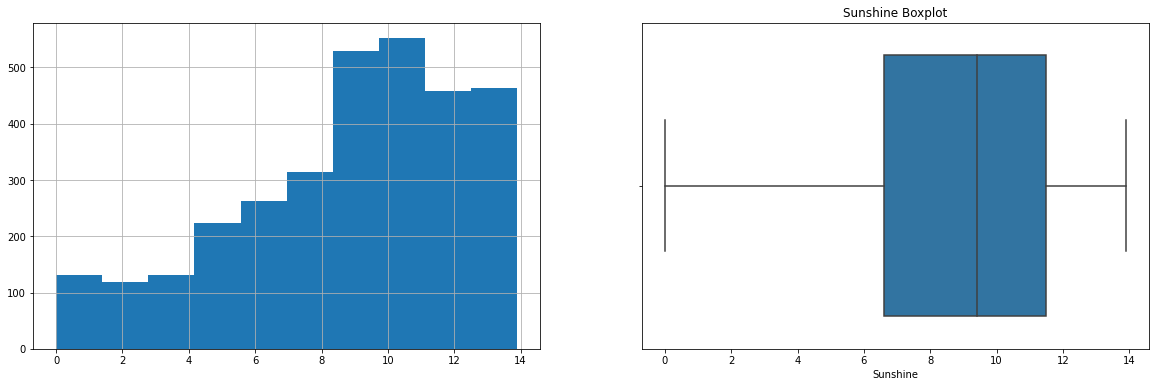

In [33]:
_, axes = plt.subplots(1, 2, figsize=(20,6))

plt.title("Sunshine Distribution")
sunshine_df.hist(ax=axes[0])

plt.title("Sunshine Boxplot")
sns.boxplot(x=sunshine_df)

plt.show()

In [34]:
sunshine_skewness = sunshine_df.skew()

print(f"Skewness of the dataset: {sunshine_skewness:.2f}")

Skewness of the dataset: -0.74


### __WindGustSpeed

📙 **SUMMARY**
* The data is expressed in **km/hr**.
* The distribution is positively skewed at `skewness` = $0.65$.
* There are $49$ outliers in the dataset.

The *WindGustSpeed* represents the speed of the strongest wind speed within 24 hours and expressed in **km/hr**.

In [35]:
wind_gust_speed_df = df['WindGustSpeed']
pd.DataFrame(wind_gust_speed_df).head(10)

,WindGustSpeed
120638,20.0
120639,22.0
120640,31.0
120641,26.0
120642,44.0
120643,24.0
120644,37.0
120645,24.0
120646,31.0
120647,46.0


There are $5$ ($0.002\%$) missing values for *WindGustSpeed* dataset.

In [36]:
missing_wind_gust_speed = wind_gust_speed_df.isna().sum()
missing_wind_gust_speed_perc = missing_wind_gust_speed / len(wind_gust_speed_df)

print(f"Missing wind gust speed values: {missing_wind_gust_speed} ({missing_wind_gust_speed_perc:.3f}%)")

Missing wind gust speed values: 5 (0.002%)


The *WindGustSpeed* values range from $11.0$ - $83.0$ with a mean of $34.88$ and a standard deviation of $9.41$.

In [37]:
pd.DataFrame(wind_gust_speed_df).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
WindGustSpeed,3188.0,34.882999,9.411943,11.0,28.0,35.0,41.0,83.0


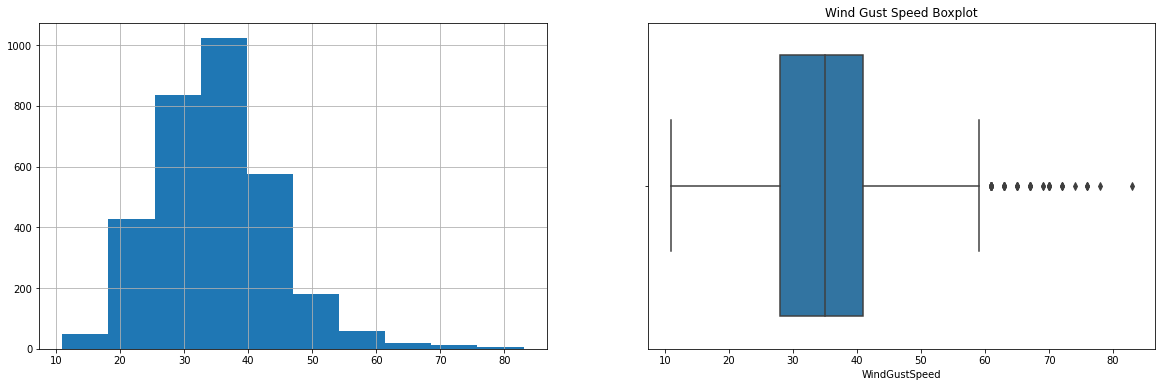

In [38]:
_, axes = plt.subplots(1, 2, figsize=(20, 6))

plt.title("Wind Gust Speed Distribution")
wind_gust_speed_df.hist(ax=axes[0])

plt.title("Wind Gust Speed Boxplot")
sns.boxplot(ax=axes[1], x=wind_gust_speed_df)

plt.show()

The data distribution is positively skewed with `skewness` = $0.65$.

In [39]:
wind_gust_speed_skewness = wind_gust_speed_df.skew()

print(f"Wind Gust Speed Skewness: {wind_gust_speed_skewness:.2f}")

Wind Gust Speed Skewness: 0.65


In [40]:
no_missing_wind_gust_speed_df = wind_gust_speed_df[~wind_gust_speed_df.isna()]

perc_75, perc_25 = np.percentile(no_missing_wind_gust_speed_df, [75, 25])
iqr = perc_75 - perc_25
boundary = perc_75 + 1.5*iqr
outliers = no_missing_wind_gust_speed_df[no_missing_wind_gust_speed_df > boundary]

print(f"Number of outliers: {len(outliers)}")
outliers.value_counts()

Number of outliers: 49


61.0    14
63.0     7
67.0     6
70.0     6
65.0     5
76.0     3
72.0     3
69.0     2
74.0     1
83.0     1
78.0     1
Name: WindGustSpeed, dtype: int64

### __WindSpeed9AM


📙 **SUMMARY**
* The data is expressed in **km/hr**.
* There is only $1$ missing value for *WindSpeed3pm*.
* The distribution of both datasets are normal and are symmetric.
* There are $5$ outlier data points on the *WindSpeed9am* dataset.

The average wind speed data over $10$ minutes prior to `9AM` (*WindSpeed9am*) and over $10$ minutes prior to `3PM` (*WindSpeed3pm*). The values are expressed in **km/hr**.

In [41]:
wind_speed_df = num_df[['WindSpeed9am', 'WindSpeed3pm']]
wind_speed_df.head(10)

,WindSpeed9am,WindSpeed3pm
120638,0.0,7.0
120639,6.0,9.0
120640,0.0,4.0
120641,11.0,6.0
120642,13.0,17.0
120643,4.0,7.0
120644,15.0,13.0
120645,9.0,13.0
120646,0.0,9.0
120647,19.0,11.0


There are no missing values for *MissingWindSpeed9am* and only $1$ missing value for *WindSpeed3pm*.

In [42]:
missing_wind_speed_count = wind_speed_df.isna().sum()
missing_wind_speed_perc = missing_wind_speed_count / len(wind_speed_df)

print(f"Missing WindSpeed9am: {missing_wind_speed_count['WindSpeed9am']} ({(missing_wind_speed_perc['WindSpeed9am'] * 100):.2f}%)")
print(f"Missing WindSpeed3pm: {missing_wind_speed_count['WindSpeed3pm']} ({(missing_wind_speed_perc['WindSpeed3pm'] * 100):.2f}%)")

Missing WindSpeed9am: 0 (0.00%)
Missing WindSpeed3pm: 1 (0.03%)


Both datasets follows the normal distribution and are roughly symmetric.The *WindSpeed9am* attribute has $5$ outlier data points whille the *WindSpeed3on* has none.

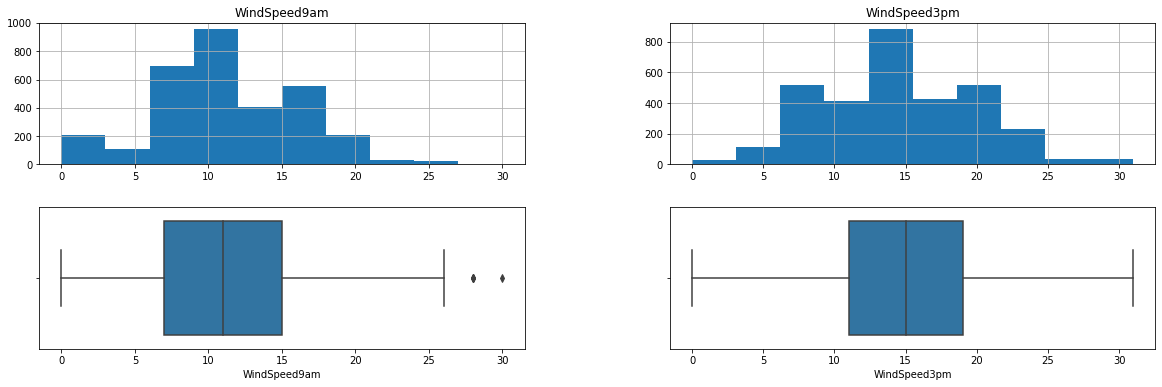

In [43]:
_, axes = plt.subplots(2,2,figsize=(20,6))

wind_speed_df.hist(ax=axes[0])

sns.boxplot(ax=axes[1,0], x=wind_speed_df['WindSpeed9am'])
sns.boxplot(ax=axes[1,1], x=wind_speed_df['WindSpeed3pm'])
plt.show()

In [44]:
wind_speed_df_skewness = wind_speed_df.skew()

print(f"WindSpeed9am skewness: {wind_speed_df_skewness['WindSpeed9am']:.2f}")
print(f"WindSpeed3pm skewness: {wind_speed_df_skewness['WindSpeed3pm']:.2f}")

WindSpeed9am skewness: 0.15
WindSpeed3pm skewness: 0.17


In [45]:
no_missing_wind_speed_9am = wind_speed_df[~wind_speed_df['WindSpeed9am'].isna()]['WindSpeed9am']


perc_75, perc_25 = np.percentile(no_missing_wind_speed_9am, [75,25])
iqr = perc_75 - perc_25
boundary = perc_75 + (1.5 * iqr)
outliers = no_missing_wind_speed_9am[no_missing_wind_speed_9am > boundary]

print(f"Number of outliers (WindSpeed9am): {len(outliers)}")
print("Outliers:")
outliers.value_counts()

Number of outliers (WindSpeed9am): 5
Outliers:


28.0    4
30.0    1
Name: WindSpeed9am, dtype: int64